    Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.core.common import random_state
from sklearn.metrics._regression import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle

Loading Dataset

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

Dataset Info

In [3]:
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   Condition1     1460 non-null   object 
 6   Condition2     1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  RoofMatl       1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtCond

Missing Values


In [4]:
missing_values=train_data.isnull().sum()
print(missing_values[missing_values>0])

LotFrontage      259
BsmtQual          37
BsmtCond          37
BsmtExposure      38
Electrical         1
GarageType        81
GarageYrBlt       81
GarageFinish      81
Fence           1179
dtype: int64


Visualizing The Dataset


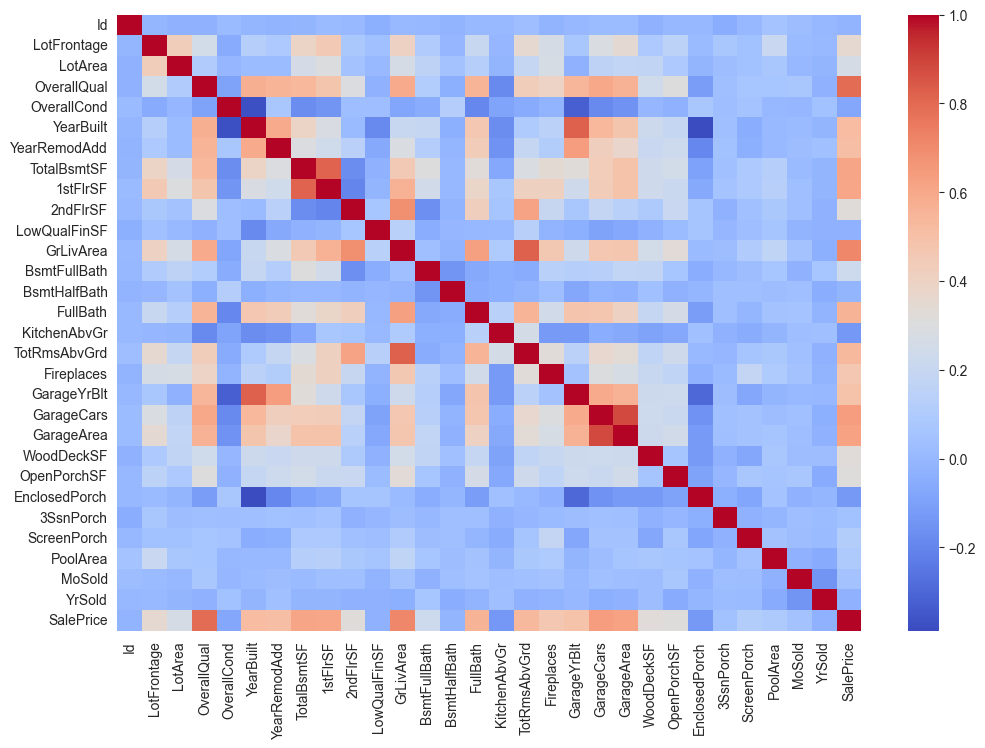

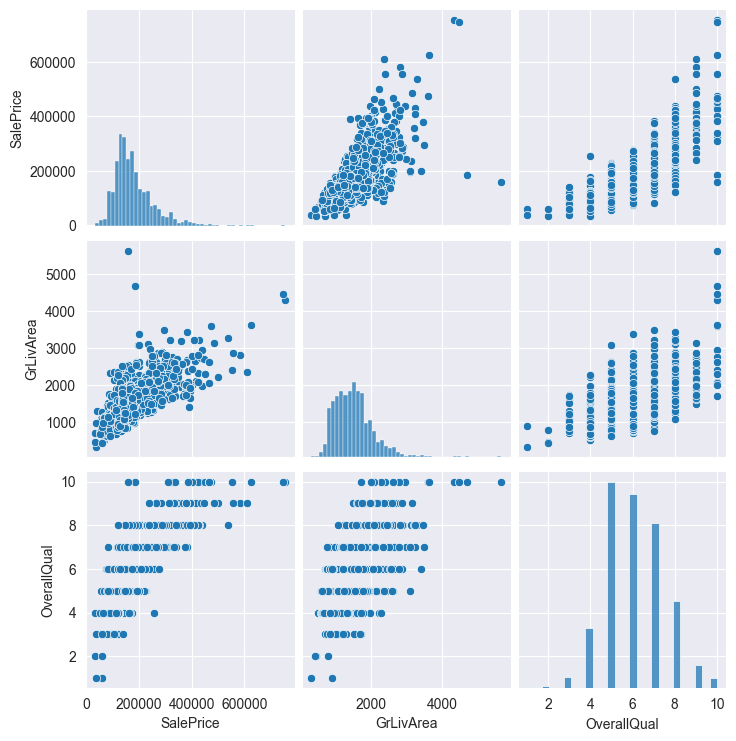

In [5]:
numerical_data=train_data.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12,8))
sb.heatmap(numerical_data.corr(),annot=False,cmap="coolwarm")
sb.pairplot(train_data, vars=["SalePrice", "GrLivArea", "OverallQual"])

plt.show()

Encoding categorical values(red, green) which does not mean anything to model


In [6]:
train_data=pd.get_dummies(train_data,drop_first=True)
test_data=pd.get_dummies(test_data,drop_first=True)

Filling NAN values with median of database


In [7]:
train_data.fillna(train_data.median(),inplace=True)
test_data.fillna(test_data.median(),inplace=True)

Making sure the columns match in both dataset


In [8]:
train_data,test_data=train_data.align(test_data,join="left",axis=1)
test_data.fillna(0,inplace=True)

Feature Selection



x=train_data.drop("3SsnPorch",axis=1)
y=train_data['3SsnPorch']

"""
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x,y)
feature_importance=pd.Series(model.feature_importances_,index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()
"""

Splitting the databse


In [9]:
x = train_data.drop('SalePrice', axis=1)  
y = train_data['SalePrice']
print(y.median())
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)


163000.0


Train a baseline Linear Regression model:


In [10]:
regresser=LinearRegression()
regresser.fit(x_train,y_train)


LinearRegression()

Predict on validation data:


In [11]:
y_pred=regresser.predict(x_val)
print(y_pred)

[ 150375.73629683  336204.78919284   84351.08566899  172628.92232278
  352001.77312316   74812.87063168  210319.74205715  149595.80445548
   72691.75430618  149302.0509332   149422.32174645  112895.56030608
   96534.20637649  197561.55178043  173249.90679164  124446.21002791
  195889.92789898  112458.28667159  126692.91964608  211733.44894103
  160699.39850833  199236.38570734  173502.59612395  131985.46628348
  209273.6160574   144491.88089027  206872.06901692   99228.80721701
  179871.72132241  217133.42239927  136558.97028957  249602.73636559
  306447.58812457  107224.36785792  250301.76108647  156821.3772008
  148992.48977287  209373.73931789  288029.14810166  112853.07856671
  128935.3498702   227187.81795515  107899.30853442  376690.95155269
  126802.26367179  149639.66996381   88050.3865873   135028.11690419
  388586.34147949  116580.98414826  107729.86371348  259314.44819891
  132347.6555081   310117.66658404  178639.58117912  240693.60768512
  196683.90132009  182723.07186379 

Calculate performance metrics (Mean Squared Error or R² Score):

In [12]:
mse=mean_squared_error(y_val,y_pred)
r2=r2_score(y_val,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 2581255700.211763
R² Score: 0.6634751077740193


 Predict on Test Data

In [13]:
test_data = test_data.drop("SalePrice", axis=1)

regresser.fit(x,y)
predictions=regresser.predict(test_data)
print("Predictions for test data:", predictions)


Predictions for test data: [-538243.64004061 -501061.74560346 -481918.92607641 ... -468644.6088939
 -546215.32258179 -424497.45376565]


Random Forest Regressor Model

In [14]:
rfmodel=RandomForestRegressor(n_estimators=100,random_state=42)
rfmodel.fit(x_train,y_train)
pred=rfmodel.predict(x_val)
print(f"Root Mean Squared Errorfor the model is:{root_mean_squared_error(y_val,pred)}")
print(f"R² Score for the model is:{r2_score(y_val,pred)}")

Root Mean Squared Errorfor the model is:30085.083756002856
R² Score for the model is:0.8819982044886678


Saving the RF model

In [15]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfmodel, file)
print("Random Forest model saved successfully!")

Random Forest model saved successfully!
